# 1. Exploração e Pré-processamento dos Dados


## a. Análise Exploratória

In [3]:
# Importação de bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Carregamento do dataset:
columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
           "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
           "hours_per_week", "native_country", "income"]

df = pd.read_csv('./adult/adult.data', names=columns, sep=',\s*', engine='python')

# Exibição das primeiras linhas:
print(df.head())

# Análise estatística básica:
print(df.describe())
print(df.info())


   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

## b. Visualização das Variáveis

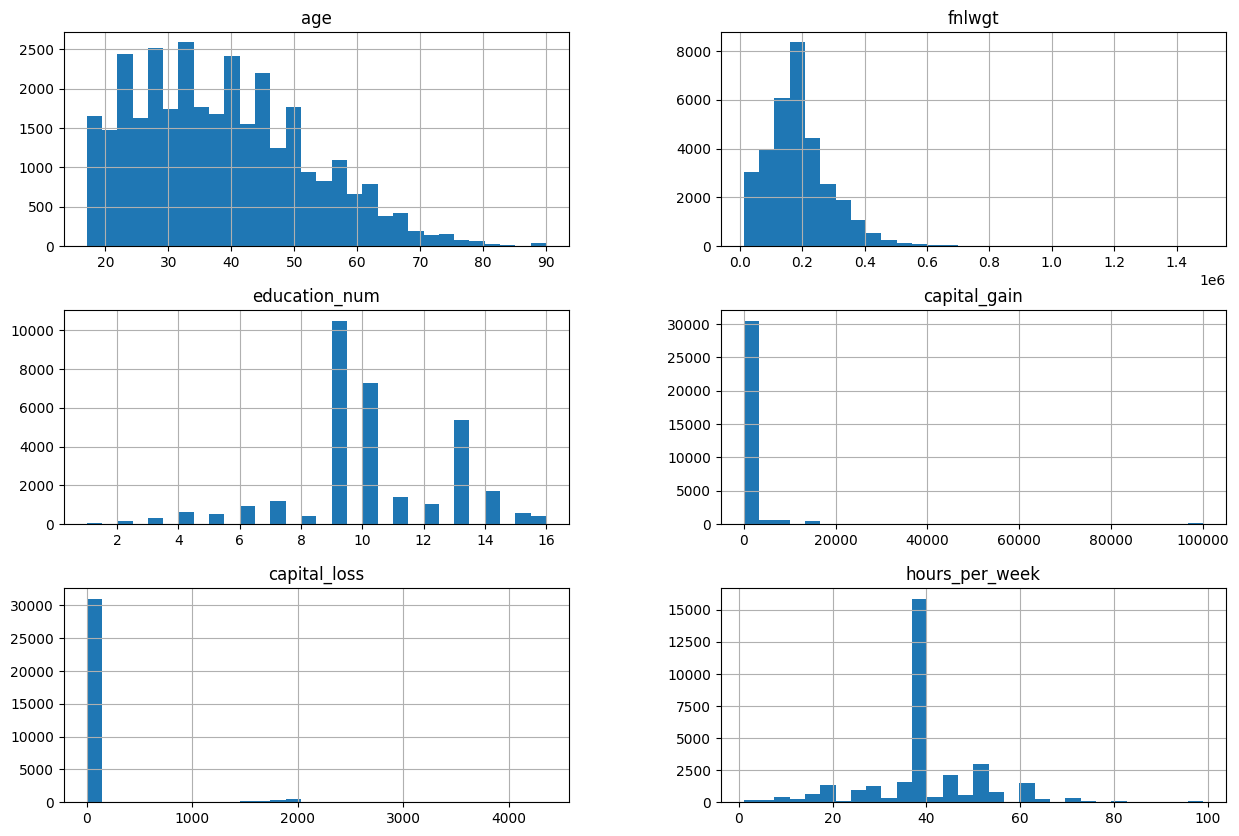

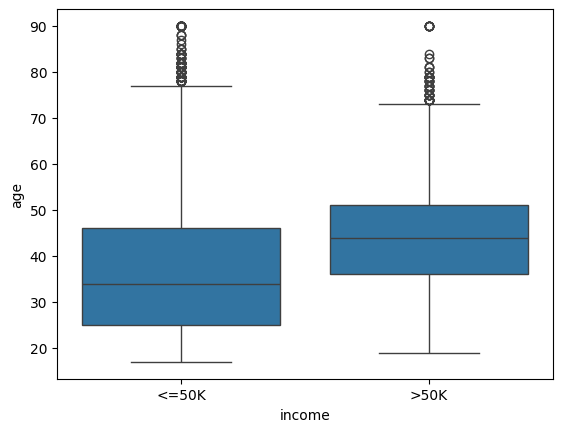

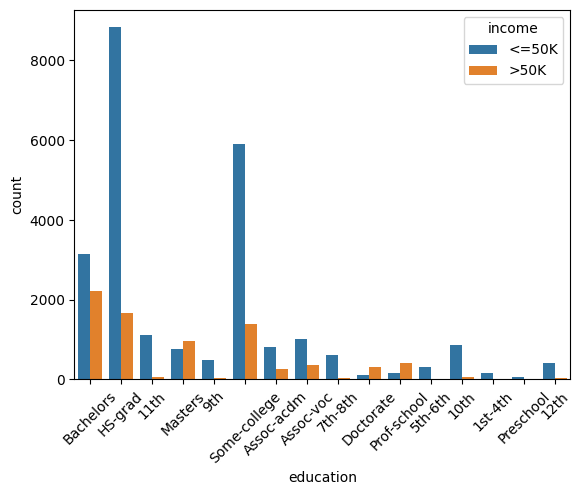

In [5]:
# Histogramas para variáveis numéricas (como age, hours-per-week, capital-gain, etc.):

df.hist(bins=30, figsize=(15, 10))
plt.show()

# Gráficos de dispersão e boxplots para variáveis categóricas e numéricas:

sns.boxplot(x='income', y='age', data=df)
plt.show()
sns.countplot(x='education', hue='income', data=df)
plt.xticks(rotation=45)
plt.show()




## c. Tratamento de Valores Ausentes e Atípicos

In [6]:
# Identificação de valores ausentes:
from scipy import stats


print(df.isnull().sum())


# Tratamento:

df.fillna(method='ffill', inplace=True)  # Exemplo: preenchendo valores ausentes

# Remoção de outliers (exemplo com age):

df = df[(np.abs(stats.zscore(df['age'])) < 3)]  # Usando Z-score


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


/tmp/ipykernel_40944/4120524341.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Exemplo: preenchendo valores ausentes


## d. Codificação de Variáveis

In [7]:
# Padronizar os nomes das colunas
df.columns = df.columns.str.replace('-', '_').str.lower()

# Verificar colunas disponíveis
print("Colunas disponíveis:", df.columns.tolist())

# Tratar valores ausentes
for column in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']:
    if column in df.columns:
        df[column].fillna('unknown', inplace=True)

# Codificar variáveis categóricas
df = pd.get_dummies(df, columns=[
    'workclass', 'education', 'marital_status', 
    'occupation', 'relationship', 'race', 
    'sex', 'native_country'
], drop_first=True)

# Visualizar o DataFrame resultante
print("DataFrame após codificação:", df.head())

Colunas disponíveis: ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
DataFrame após codificação:    age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

  income  workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0  <=50K                  False                False                   False   
1  <=50K                  False                False                   False   
2  <=50K                  False               

/tmp/ipykernel_40944/3450484345.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('unknown', inplace=True)


# 2. Estruturação da Rede Bayesiana

## a. Construção da Rede

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Selecionando as colunas preditoras e a variável alvo
X = df[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']]  # Variáveis preditoras
y = df['income']  # Variável alvo

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelagem com Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Previsões e avaliação
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)


Acurácia do modelo: 0.8047163995067818


## b. Justificação da Estrutura

In [ ]:
# Análise de dados e conhecimento prévio: A escolha das dependências deve ser justificada com base em:

#     A correlação observada nas análises.
#     O conhecimento prévio sobre como essas variáveis afetam a renda.



# 3. Treinamento e Ajuste de Hiperparâmetros

## a. Treinamento da Rede

In [10]:
# Importação de dados para treinamento
from pgmpy.models import BayesianNetwork  # Substituído por BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Definição da estrutura da Rede Bayesiana
model = BayesianNetwork([
    ('age', 'income'),
    ('education_num', 'income'),
    ('capital_gain', 'income'),
    ('capital_loss', 'income'),
    ('hours_per_week', 'income')
])

# Treinamento do modelo com o MaximumLikelihoodEstimator
model.fit(df, estimator=MaximumLikelihoodEstimator)

# Inferência usando VariableElimination para consultar o modelo
inference = VariableElimination(model)

# Exemplo de consulta: calcular a probabilidade de 'income' dado um valor de 'age' e 'education_num'
query_result = inference.query(variables=['income'], evidence={'age': 35, 'education_num': 10})
print(query_result)


: 

## b. Ajuste de Hiperparâmetros

In [ ]:
# Ajuste da estrutura da rede: Você pode usar métodos como K2 ou Hill Climb para otimizar a estrutura.

from pgmpy.estimators import HillClimbSearch, BicScore

hc = HillClimbSearch(df)
best_model = hc.estimate(scoring_method=BicScore(df))




# 4. Avaliação do Modelo

## a. Uso de Métricas

In [ ]:
# Predição e avaliação:

inference = VariableElimination(model)
predicted = inference.map_query(variables=['income'], evidence={'age': 30, 'education_HS-grad': 1, 'occupation_Exec-managerial': 1})



## b. Cálculo de Métricas

In [ ]:
# Acurácia, Entropia Cruzada, AUC:
# Primeiro, divida seus dados em conjuntos de treino e teste.

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(df.drop('income', axis=1), df['income'], test_size=0.2, random_state=42)

# Após treinar seu modelo, faça previsões
y_pred = model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
